In [1]:
# Import necessary libraries for plotting, numerical operations, and PyTorch functionality.
from matplotlib import pyplot as plt
import numpy as np
import torch

In [ ]:
# Set options for printing tensors:
# - edgeitems: number of elements to print at the beginning and end of each dimension.
# - linewidth: maximum number of characters per line when printing a tensor.
torch.set_printoptions(edgeitems=2, linewidth=75)


# Set a manual seed for reproducibility so that random operations yield the same results.
torch.manual_seed(123)

# Import the torchvision.datasets module to load datasets such as CIFAR10.
from torchvision import datasets

In [ ]:
# Define the path to where the dataset will be stored.
data_path = "../data-unversioned/p1ch7/"


# Load the CIFAR10 training dataset.
# 'download=True' makes sure the data is downloaded if it's not already present.
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)  # <1>

# Load the CIFAR10 test/validation dataset.
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)  # <2>

Files already downloaded and verified
Files already downloaded and verified


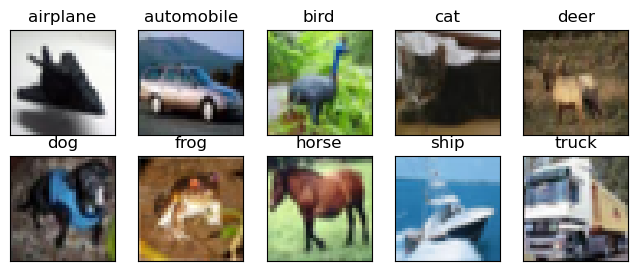

In [ ]:
# Define the list of class names corresponding to the CIFAR10 labels.
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# Create a matplotlib figure with a specified size.
fig = plt.figure(figsize=(8, 3))
num_classes = 10

# Loop over each class to plot one image per class.
for i in range(num_classes):
    # Create a subplot for each class; here arranged in 2 rows and 5 columns.
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    # Set the title of each subplot to the class name.
    ax.set_title(class_names[i])
    # Retrieve the first image from the dataset that has the label equal to the current class index.
    img = next(img for img, label in cifar10 if label == i)
    # Display the image in the subplot.
    plt.imshow(img)
# Display the full figure with all subplots.
plt.show()

In [ ]:
# Check the method resolution order for the CIFAR10 dataset class.
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
# Get the total number of images in the CIFAR10 training dataset.
len(cifar10)

50000

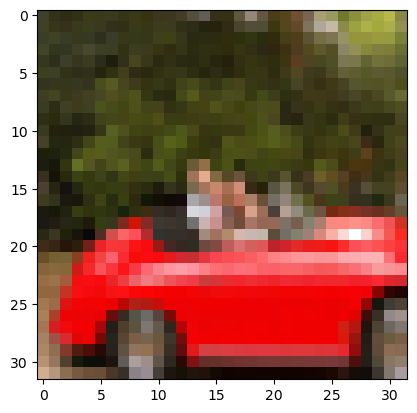

In [ ]:
# Access the 100th image (index 99) and its corresponding label.
img, label = cifar10[99]
# Display the image, label, and corresponding class name.
img, label, class_names[label]

# Plot the selected image using matplotlib.
plt.imshow(img)
plt.show()

In [ ]:
# Import transforms from torchvision to apply preprocessing to the images.
from torchvision import transforms

# List all the attributes and methods in the transforms module (useful for exploration).
dir(transforms)

# Create a transform to convert a PIL Image to a PyTorch tensor.
to_tensor = transforms.ToTensor()
# Convert the image to a tensor.
img_t = to_tensor(img)
# Display the shape of the resulting tensor.
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
# Create a new CIFAR10 dataset instance that applies the ToTensor transform
# so that all images are converted to tensors when accessed.
tensor_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False, transform=transforms.ToTensor()
)

# Get the 100th image (already transformed to a tensor) from the dataset.
img_t, _ = tensor_cifar10[99]
# Check the type of the image tensor.
type(img_t)

torch.Tensor

In [ ]:
# Check the shape and data type of the image tensor.
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
# Find the minimum and maximum pixel values in the tensor.
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

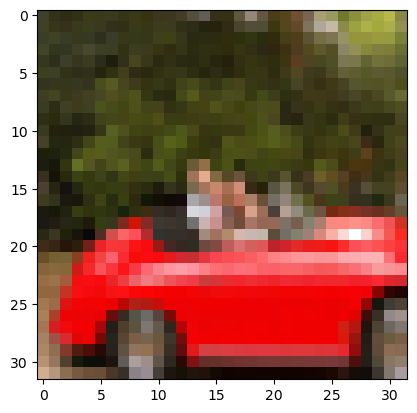

In [ ]:
# Since the tensor has channels as the first dimension (C x H x W), we need to
# permute the dimensions to (H x W x C) to display it correctly with matplotlib.
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [15]:
# Stack all image tensors from the dataset along a new dimension (the 4th dimension).
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
# Display the shape of the stacked tensor.
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
# Reshape the tensor to collapse the spatial dimensions and compute the mean per channel.
# This gives an estimate of the dataset's mean pixel values for each channel.
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4914, 0.4822, 0.4465])

In [18]:
# Similarly, compute the standard deviation for each channel.
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
# Define a normalization transform using the calculated mean and std values.
# This normalization will standardize the dataset's images.
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
# Create a new dataset that applies both the ToTensor and Normalize transforms.
# The normalization is applied after converting the image to a tensor.
transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
        ]
    ),
)

In [ ]:
# Create a similar transformed dataset for validation data.
transformed_cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616)),
        ]
    ),
)

In [ ]:
# Access the 100th transformed image from the training dataset.
img_t, _ = transformed_cifar10[99]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


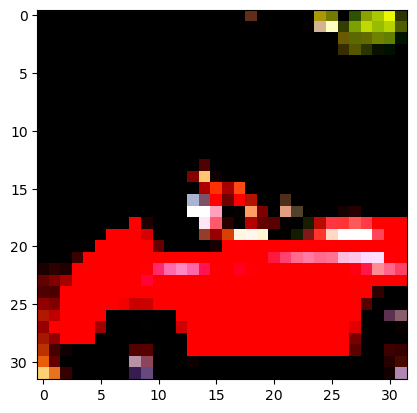

In [ ]:
# Plot the transformed image.
# Note: The normalization may make the image appear different because pixel values
# have been standardized (mean subtracted and divided by std), so the colors may look off.
plt.imshow(img_t.permute(1, 2, 0))
plt.show()